In [1]:
# HIDDEN
import warnings
warnings.filterwarnings('ignore')
from datascience import *
from prob140 import *
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline
from scipy import stats

## Poissonizing the Binomial ##

Suppose $N_H$ is the number of heads in 100 tosses of a coin, and $N_T$ the number of tails. Then $N_H$ and $N_T$ are far from independent. They are linear functions of each other because $N_T = 100 - N_H$. 

The same is true of any fixed number of tosses: if you know the number of heads, then you also know the number of tails. 

In any fixed number of Bernoulli trials, the number of successes and the number of failures are as dependent as it gets. If you know one, you know the other.

However, something remarkable happens when the *number of trials is itself random and has a Poisson distribution.* After we see what happens, we will be able to understand why it matters.

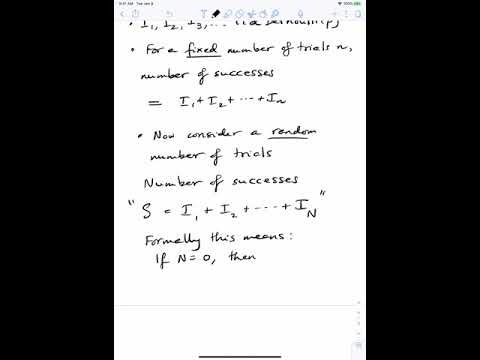

In [2]:
# VIDEO: Poisson Number of Trials
from IPython.display import YouTubeVideo

YouTubeVideo('lnLUsr24r88')

### Randomizing the Number of Bernoulli Trials ###

Let $N$ have the Poisson $(\mu)$ distribution, let $S$ be the number of successes in $N$ i.i.d. Bernoulli $(p)$ trials. More formally: 
- Given $N = 0$, define $S$ to be 0 with probability 1. Given that there are no trials, there are also no successes.
- For $n \ge 1$, let the conditional distribution of $S$ given $N = n$ be binomial $(n, p)$.

Then the joint distribution of $N$ and $S$ is given by:

$$
P(N=n, S=s) ~ = ~ e^{-\mu}\frac{\mu^n}{n!} \cdot 
\frac{n!}{s!(n-s)!} p^s(1-p)^{n-s}, ~~ 0 \le s \le n
$$

You should check that the formula is correct when $n=0$.

We can sum the terms in this joint distribution appropriately to get the marginal distribution of $S$.

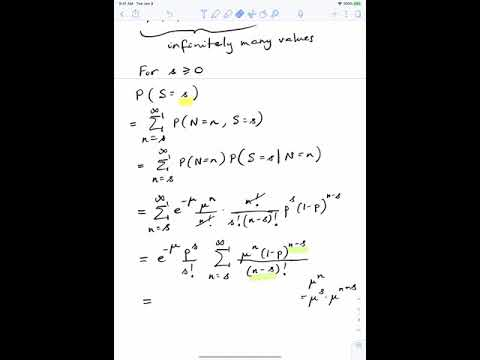

In [3]:
# VIDEO: Poisson Number of Successes

YouTubeVideo('JQT1NQNbxsQ')

### A Poisson Number of Successes ###
The possible values of $S$ are $0, 1, 2, \ldots$ with no upper limit because there is no upper limit on the possible values of $N$. For $s \ge 0$,

$$
\begin{align*}
P(S = s) &= \sum_{n=s}^\infty P(N=n, S=s) \\ \\
&= \sum_{n=s}^\infty e^{-\mu}\frac{\mu^n}{n!} \cdot 
\frac{n!}{s!(n-s)!} p^sq^{n-s} ~~~~ \text{where } q = 1-p \\ \\
&= e^{-\mu} \frac{\mu^sp^s}{s!} \sum_{n=s}^\infty
\frac{\mu^{n-s}q^{n-s}}{(n-s)!} \\ \\
&= e^{-\mu} \frac{(\mu p)^s}{s!} \sum_{n=s}^\infty
\frac{(\mu q)^{n-s}}{(n-s)!} \\ \\
&= e^{-\mu} \frac{(\mu p)^s}{s!} \sum_{j=0}^\infty
\frac{(\mu q)^j}{j!} \\ \\
&= e^{-\mu} \frac{(\mu p)^s}{s!} e^{\mu q} \\ \\
&= e^{-\mu p} \frac{(\mu p)^s}{s!} ~~ \text{because } \mu p+ \mu q = \mu
\end{align*}
$$

Thus the distribution of $S$ is Poisson with parameter $\mu p$.

Notice what we have just proved. 

- If the number of trials $n$ is fixed, you know that the distribution of the number of successes is binomial $(n, p)$. 
- But if the the number of trials is random with a Poisson $(\mu)$ distribution, then the distribution of the number of successes is Poisson $(\mu p)$. 

This is a major step in *Poissonizing* the binomial.

The best is yet to come, but let's take a moment to look at the result numerically. Suppose you run a Poisson $(12)$ number of i.i.d. Bernoulli $(1/3)$ trials. Then the number of trials is most likely to be somewhere around 12, but you can't say exactly what it will be because it's random. What we have shown is that the number of successes is Poisson with parameter $12 \times \frac{1}{3} = 4$.

The parameter 4 is not hard to understand intuitively. You're most likely to see around 12 trials, and about 1/3 of them are going to be successes, so you're most likely to see around 4 successes.

```{admonition} Quick Check
Each time I throw a dart, I have chance $1/4$ of hitting the bullseye, independently of all other times. Find the chance that I hit the bullseye 5 times if

(a) I throw the dart 24 times

(b) I pick a random number $N$ from a Poisson $(24)$ distribution, and then throw the dart $N$ times

```

```{admonition} Answer
:class: dropdown
(a) $\binom{24}{5} 0.25^5 0.75^{19}$

(b) $e^{-6}\frac{6^5}{5!}$

```

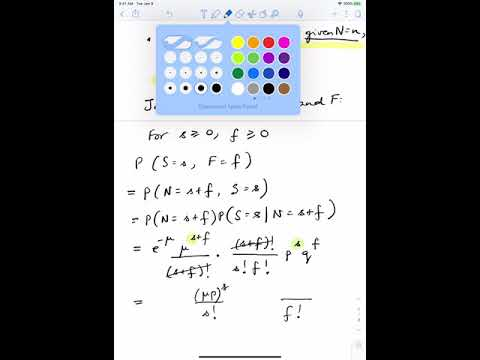

In [4]:
# VIDEO: Successes and Failures

YouTubeVideo('2qLF6nNWPiw')

### Successes and Failures are Independent ###
Yes, you read that right. If you run a Poisson number of i.i.d. Bernoulli trials, then the number of successes and the number of failures are *independent*.

Randomizing parameters (in this case the number of trials) can have a dramatic effect on the relations between random variables.

Let's prove our result, and then we will see a way in which it is used.

Suppose as before that we are running $N$ i.i.d. Bernoulli $(p)$ trials, where $N$ has the Poisson $(\mu)$ distribution independent of the results of the trials. Also as before, let $S$ be the number of successes. 

Now let $F$ be the number of failures. Then the distribution of $F$ is Poisson $(\mu q)$ where $q = 1-p$. This follows by redefining "success" as "failure" in our previous argument.

The joint distribution of $S$ and $F$ is

$$
\begin{align*} 
P(S = s, F = f) &= P(N = s+f, S = s) \\ \\
&= e^{-\mu} \frac{\mu^{s+f}}{(s+f)!} \frac{(s+f)!}{s!f!} p^s q^f \\ \\
&= \big{(} e^{-\mu p} \frac{ (\mu p)^s}{s!} \big{)} 
\big{(} e^{-\mu q} \frac{ (\mu q)^f}{f!} \big{)} \\ \\
&= P(S = s)P(F = f)
\end{align*}
$$

This shows that $S$ and $F$ are independent.

### Summary: Poissonization of the Binomial ###
Suppose you run $N$ i.i.d. Bernoulli $(p)$ trials, where $N$ has the Poisson $(\mu)$ distribution independent of the results of the trials. Let $S$ be the number of successes and $F$ the number of failures, and let $q = 1-p$. Then:

- $S$ has the Poisson $(\mu p)$ distribution
- $F$ has the Poisson $(\mu q)$ distribution
- $S$ and $F$ are independent

For example, suppose 90% of the individuals in a population are of Class A and 10% are of Class B. Suppose you draw $N$ times at random with replacement from the population, where $N$ has the Poisson $(20)$ distribution independent of the results of your draws. Then in your sample,

- the number of people of Class A has the Poisson $(18)$ distribution,
- the number in Class B has the Poisson $(2)$ distribution,
- and the counts in the two classes are independent.

Thus for example the chance that each class appears at least five times in your sample is

$$
\big{(} \sum_{i=5}^\infty e^{-{18}} \frac{18^i}{i!} \big{)}
\big{(} \sum_{j=5}^\infty e^{-{2}} \frac{2^j}{j!} \big{)}
~ = ~ 
\big{(}1 - \sum_{i=0}^4 e^{-{18}} \frac{18^i}{i!} \big{)}
\big{(}1- \sum_{j=0}^4 e^{-{2}} \frac{2^j}{j!} \big{)}
$$

This is just over 5%.

In [5]:
(1 - stats.poisson.cdf(4, 18))*(1 - stats.poisson.cdf(4, 2))

0.052648585218160585

```{admonition} Quick Check
Each time I throw a dart, I have chance $1/4$ of hitting the bullseye, independently of all other times. Suppose I pick a random number $N$ from a Poisson $(24)$ distribution, and then throw the dart $N$ times. What is the chance that I hit the bullseye 5 times and miss 10 times?

```

```{admonition} Answer
:class: dropdown
$e^{-6}\frac{6^5}{5!} \cdot e^{-18}\frac{18^{10}}{10!}$

```